<a href="https://colab.research.google.com/github/PamelaKinga/feature_selection/blob/main/Chi2_and_SelectKBest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Feature Selection**: Basic Methods - Univariate Selection Methods (SelectKBest with the Chi2 test statistic)

**Data:** from [Kaggle's Mushroom Classification dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification). The data was donated to the UCI Machine Learning repository and includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). The goal is to determine which mushrooms are edible or poisonous using data of mushroom characteristics. This is a classification problem.

# Data

In [1]:
# First mount Gdrive to Colab for these steps to work
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! kaggle datasets download -d uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 1.69MB/s]


In [3]:
! unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


# Install Libraries

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv('mushrooms.csv')

In [6]:
df.shape

(8124, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Pre-Processing 

In [9]:
# Setting up the target variable and creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['class_encoded'] = labelencoder.fit_transform(df['class'])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_encoded
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,o,o,p,o,o,p,b,c,l,0
8120,e,x,s,n,f,n,a,c,b,y,...,o,o,p,n,o,p,b,v,l,0
8121,e,f,s,n,f,n,a,c,b,n,...,o,o,p,o,o,p,b,c,l,0
8122,p,k,y,n,f,y,f,c,n,b,...,w,w,p,w,o,e,w,v,l,1


Before performing the chi-square test, make sure the data is label encoded

In [10]:
# Converting categorical variables to numerical values using dummies
# Assigning numerical values and storing in another column
df['ring_type_encoded'] = labelencoder.fit_transform(df['ring-type'])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_encoded,ring_type_encoded
0,p,x,s,n,t,p,f,c,n,k,...,w,p,w,o,p,k,s,u,1,4
1,e,x,s,y,t,a,f,c,b,k,...,w,p,w,o,p,n,n,g,0,4
2,e,b,s,w,t,l,f,c,b,n,...,w,p,w,o,p,n,n,m,0,4
3,p,x,y,w,t,p,f,c,n,n,...,w,p,w,o,p,k,s,u,1,4
4,e,x,s,g,f,n,f,w,b,k,...,w,p,w,o,e,n,a,g,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,o,p,o,o,p,b,c,l,0,4
8120,e,x,s,n,f,n,a,c,b,y,...,o,p,n,o,p,b,v,l,0,4
8121,e,f,s,n,f,n,a,c,b,n,...,o,p,o,o,p,b,c,l,0,4
8122,p,k,y,n,f,y,f,c,n,b,...,w,p,w,o,e,w,v,l,1,0


In [11]:
# Converting categorical variables to numerical values using dummies
# Assigning numerical values and storing in another column
df['cap_color_encoded'] = labelencoder.fit_transform(df['cap-color'])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_encoded,ring_type_encoded,cap_color_encoded
0,p,x,s,n,t,p,f,c,n,k,...,p,w,o,p,k,s,u,1,4,4
1,e,x,s,y,t,a,f,c,b,k,...,p,w,o,p,n,n,g,0,4,9
2,e,b,s,w,t,l,f,c,b,n,...,p,w,o,p,n,n,m,0,4,8
3,p,x,y,w,t,p,f,c,n,n,...,p,w,o,p,k,s,u,1,4,8
4,e,x,s,g,f,n,f,w,b,k,...,p,w,o,e,n,a,g,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,p,o,o,p,b,c,l,0,4,4
8120,e,x,s,n,f,n,a,c,b,y,...,p,n,o,p,b,v,l,0,4,4
8121,e,f,s,n,f,n,a,c,b,n,...,p,o,o,p,b,c,l,0,4,4
8122,p,k,y,n,f,y,f,c,n,b,...,p,w,o,e,w,v,l,1,0,4


In [12]:
# Converting categorical variables to numerical values using dummies
# Assigning numerical values and storing in another column
df['spore_print_color_encoded'] = labelencoder.fit_transform(df['spore-print-color'])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_encoded,ring_type_encoded,cap_color_encoded,spore_print_color_encoded
0,p,x,s,n,t,p,f,c,n,k,...,w,o,p,k,s,u,1,4,4,2
1,e,x,s,y,t,a,f,c,b,k,...,w,o,p,n,n,g,0,4,9,3
2,e,b,s,w,t,l,f,c,b,n,...,w,o,p,n,n,m,0,4,8,3
3,p,x,y,w,t,p,f,c,n,n,...,w,o,p,k,s,u,1,4,8,2
4,e,x,s,g,f,n,f,w,b,k,...,w,o,e,n,a,g,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,o,o,p,b,c,l,0,4,4,0
8120,e,x,s,n,f,n,a,c,b,y,...,n,o,p,b,v,l,0,4,4,0
8121,e,f,s,n,f,n,a,c,b,n,...,o,o,p,b,c,l,0,4,4,0
8122,p,k,y,n,f,y,f,c,n,b,...,w,o,e,w,v,l,1,0,4,7


# Create Chi2 Test Variable

Chi2 test works on categorical variables or discrete variables

In [14]:
# Create a function to accept crosstab tables created to test features, and a confidence interval value to validate the hypothesis against
# Uses the stats API which has the function chi2_contingency 
# Feature and target columns must be categorical or discrete

def check_categorical_dependency(crosstab_table, confidence_interval):
  stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
  print("Chi-Square Statistic value = {}".format(stat))
  print("P - Value = {}".format(p))
  alpha = 1.0 - confidence_interval
  if p <= alpha:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  return expected

# Univariate Testing

First create crosstabs between feature and target variables. This will be used to test the feature against the target ('class') on the feature for inclusion in the feature set, based on the null hypothesis.

Here, testing three variables: cap-color, ring-type, spore-print-color

In [15]:
# Crosstabs of feature and target combinations
cap_color_crosstab = pd.crosstab(df['cap-color'], df['class'], margins = True)
cap_color_crosstab

class,e,p,All
cap-color,,,
b,48,120,168
c,32,12,44
e,624,876,1500
g,1032,808,1840
n,1264,1020,2284
p,56,88,144
r,16,0,16
u,16,0,16
w,720,320,1040


In [16]:
ring_type_crosstab = pd.crosstab(df['ring-type'], df['class'], margins = True)
ring_type_crosstab

class,e,p,All
ring-type,,,
e,1008,1768,2776
f,48,0,48
l,0,1296,1296
n,0,36,36
p,3152,816,3968
All,4208,3916,8124


In [17]:
spore_print_color_crosstab = pd.crosstab(df['spore-print-color'], df['class'], margins = True)
spore_print_color_crosstab

class,e,p,All
spore-print-color,,,
b,48,0,48
h,48,1584,1632
k,1648,224,1872
n,1744,224,1968
o,48,0,48
r,0,72,72
u,48,0,48
w,576,1812,2388
y,48,0,48


Test each crosstab against the Chi2 test statistic to reject or accept the null hypothesis that the relationship between the target and feature is independent.

In [18]:
# Pass cross-tab table and the confidence interval to check against
exp_table_1 = check_categorical_dependency(cap_color_crosstab, 0.95)

Chi-Square Statistic value = 387.59776897722986
P - Value = 7.605907803439184e-70
Dependent (reject H0)


In [19]:
# Pass cross-tab table and the confidence interval to check against
exp_table_2 = check_categorical_dependency(ring_type_crosstab, 0.95)

Chi-Square Statistic value = 2956.6192780575316
P - Value = 0.0
Dependent (reject H0)


In [20]:
# Pass cross-tab table and the confidence interval to check against
exp_table_3 = check_categorical_dependency(spore_print_color_crosstab, 0.95)

Chi-Square Statistic value = 4602.0331700846045
P - Value = 0.0
Dependent (reject H0)


In [21]:
# Observe the expected values of a table
pd.DataFrame(exp_table_3)

,0,1,2
0,24.862629,23.137371,48.0
1,845.329394,786.670606,1632.0
2,969.642541,902.357459,1872.0
3,1019.367799,948.632201,1968.0
4,24.862629,23.137371,48.0
5,37.293944,34.706056,72.0
6,24.862629,23.137371,48.0
7,1236.915805,1151.084195,2388.0
8,24.862629,23.137371,48.0
9,4208.000000,3916.000000,8124.0


# Feature Selection using Chi-Square

In [22]:
X = df[["ring_type_encoded","cap_color_encoded", "spore_print_color_encoded"]]

In [23]:
y = df[["class_encoded"]]

In [24]:
X_new = SelectKBest (chi2, k="all").fit_transform(X,y)
#X_new = SelectKBest (chi2, k=1).fit_transform(X,y)

In [25]:
# The Chi2 method has selected the top feature
X_new.shape

(8124, 3)

Visualize the p-values of the features

In [26]:
chi_scores = chi2(X,y)

In [27]:
# Here the first array represents chi square values and second array represnts p-values
chi_scores

(array([1950.61014644,   11.51138164,  379.13272877]),
 array([0.00000000e+00, 6.91713451e-04, 1.92211948e-84]))

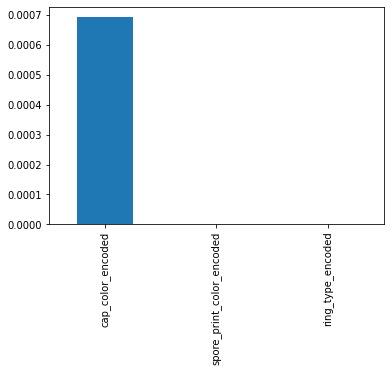

In [28]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

This is an example of implementing the Chi2 statistic in the SelectKBest feature selection method.

# Alternate Method

Test multiple features and show their scores together. Only three features have been label encoded in this excercise, which is why only three are displayed here.

In [32]:
#Apply SelectKBest class to extract top n features
bestfeatures = SelectKBest(score_func = chi2, k=3)
fit = bestfeatures.fit(X,y)

In [33]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [34]:
#Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score'] #naming the dataframe columns

In [35]:
featureScores

,Specs,Score
0,ring_type_encoded,1950.610146
1,cap_color_encoded,11.511382
2,spore_print_color_encoded,379.132729


The End